<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data collection

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [2]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [3]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 365)
start, end

(datetime.datetime(2023, 11, 1, 20, 53, 32, 76753),
 datetime.datetime(2024, 10, 31, 20, 53, 32, 76753))

In [4]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [5]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                       Adj Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-02 00:00:00+00:00  176.665985  345.724945  43.492844  218.509995   
2023-11-03 00:00:00+00:00  175.750671  350.171600  44.991390  219.960007   
2023-11-06 00:00:00+00:00  178.317535  353.873810  45.737164  219.270004   
2023-11-07 00:00:00+00:00  180.894363  357.844025  45.941105  222.179993   
2023-11-08 00:00:00+00:00  181.958878  360.494080  46.559914  222.110001   

Price                           Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-02 00:00:00+00:00  177.570007  348.320007  43.506001  218.509995   
2023-11-03 00:00:00+00:00  176.649994  352.799988  45.005001  219.960007   
2023-11-06 00:00:00+00:00  179.229996  356.529999  45.750999  219.270004   
2023-11-07 00:00:00+00:00  181.820007  360.529999  45.955002  222.179993   
2023-11-08 00:00:00+00:00  182.889999  363.200012  46.574001  222.110001   

Price                            High              ...        Low              \
Ticker                           AAPL        MSFT  ...       NVDA        TSLA   
Date                                               ...                          
2023-11-02 00:00:00+00:00  177.779999  348.829987  ...  42.894001  211.449997   
2023-11-03 00:00:00+00:00  176.820007  354.390015  ...  43.723000  218.399994   
2023-11-06 00:00:00+00:00  179.429993  357.540009  ...  44.898998  215.000000   
2023-11-07 00:00:00+00:00  182.440002  362.459991  ...  45.158001  215.720001   
2023-11-08 00:00:00+00:00  183.449997  363.869995  ...  45.967999  217.639999   

Price                            Open                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-02 00:00:00+00:00  175.520004  347.239990  43.327999  212.970001   
2023-11-03 00:00:00+00:00  174.240005  349.630005  44.020000  221.149994   
2023-11-06 00:00:00+00:00  176.380005  353.450012  45.285000  223.979996   
2023-11-07 00:00:00+00:00  179.179993  359.399994  45.719002  219.979996   
2023-11-08 00:00:00+00:00  182.350006  361.679993  46.099998  223.149994   

Price                        Volume                                  
Ticker                         AAPL      MSFT       NVDA       TSLA  
Date                                                                 
2023-11-02 00:00:00+00:00  77334800  24348100  409172000  125987600  
2023-11-03 00:00:00+00:00  79763700  23624000  424610000  119281000  
2023-11-06 00:00:00+00:00  63841300  23828300  400733000  117335800  
2023-11-07 00:00:00+00:00  70530000  25833900  343165000  116900100  
2023-11-08 00:00:00+00:00  49340300  26767800  346719000  106584800  

[5 rows x 24 columns]

In [6]:
df.index

DatetimeIndex(['2023-11-02 00:00:00+00:00', '2023-11-03 00:00:00+00:00',
               '2023-11-06 00:00:00+00:00', '2023-11-07 00:00:00+00:00',
               '2023-11-08 00:00:00+00:00', '2023-11-09 00:00:00+00:00',
               '2023-11-10 00:00:00+00:00', '2023-11-13 00:00:00+00:00',
               '2023-11-14 00:00:00+00:00', '2023-11-15 00:00:00+00:00',
               ...
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=251, freq=None)

In [7]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [8]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2023-11-02 00:00:00+00:00,177.570007,348.320007,43.506001,218.509995
2023-11-03 00:00:00+00:00,176.649994,352.799988,45.005001,219.960007
2023-11-06 00:00:00+00:00,179.229996,356.529999,45.750999,219.270004
2023-11-07 00:00:00+00:00,181.820007,360.529999,45.955002,222.179993
2023-11-08 00:00:00+00:00,182.889999,363.200012,46.574001,222.110001


In [9]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,251.000000,251.000000,251.000000,251.000000
mean,199.360837,410.968964,93.057458,209.442789
std,21.312395,24.211598,30.212069,30.777121
min,165.000000,348.320007,43.506001,142.050003
25%,182.815002,399.364990,66.816002,180.000000
50%,193.050003,414.670013,91.356003,210.600006
75%,221.620003,425.250000,120.954002,237.709999
max,236.479996,467.559998,143.710007,269.190002


<Axes: xlabel='Date'>

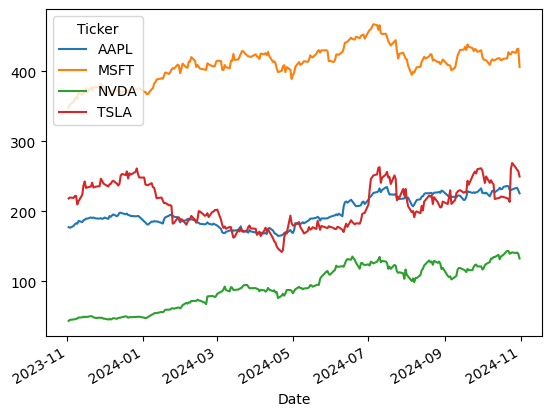

In [10]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [11]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [12]:
twitter_data = []

In [44]:
%%time
from google.colab import userdata
import requests
import pandas as pd
# Retrieve the 'twitter_api_key' secret from Colab
twitter_api_key = userdata.get('twitter_api_key')


payload = {
    'api_key': twitter_api_key,
    'query':'Stock',
    'num': '10'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)

# Check the response status code
if response.status_code == 200:
  twitter_data = response.json()
  # Proceed with processing the JSON data
else:
  print(f"Error: Request failed with status code {response.status_code}")
  print(response.text) # Print the response content to see the error message

CPU times: user 33.5 ms, sys: 8.04 ms, total: 41.6 ms
Wall time: 4.14 s


In [45]:
twitter_data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "Alphabet quiets the doubters with 'all-around' strength that sends stock soaring ... Carvana's stock soars 20% as used-car retailer calls for better times ahead.",
   'highlighs': ['stock', 'stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Stocktwits',
   'snippet': '✓ EPS of $6.03, beating estimates of $5.21 ✓ Revenue of $40.6B, beating estimates of $40.1B Stock is down 1% after-hours Listen to the call LIVE on Stocktwits\xa0...',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 2,
   'title': '5 things to know before the stock market opens Thursday',
   'snippet': '5 things to know before the stock market opens Thursday https://t.co/YDjpbGGZel.',
   'highlighs': ['stock'],
   'link':

In [46]:
# from pprint import pprint

# print(f"The type of data is: {type(data)}")
# print("Here is the content of data:")
# pprint(data)

# Data preproccessing

In [47]:
print(twitter_data)

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'}, 'organic_results': [{'position': 0, 'title': 'MarketWatch', 'snippet': "Alphabet quiets the doubters with 'all-around' strength that sends stock soaring ... Carvana's stock soars 20% as used-car retailer calls for better times ahead.", 'highlighs': ['stock', 'stock'], 'link': 'https://twitter.com/marketwatch', 'displayed_link': '4.6M+ followers'}, {'position': 1, 'title': 'Stocktwits', 'snippet': '✓ EPS of $6.03, beating estimates of $5.21 ✓ Revenue of $40.6B, beating estimates of $40.1B Stock is down 1% after-hours Listen to the call LIVE on Stocktwits\xa0...', 'highlighs': ['Stock'], 'link': 'https://twitter.com/stocktwits', 'displayed_link': '1M+ followers'}, {'position': 2, 'title': '5 things to know before the stock market opens Thursday', 'snippet': '5 things to know before the stock market opens Thursday https://t.co/YDjpbGGZel.', 'highlighs': ['stock'], 'link': 'https://twitter.com/CNBC/status/1851950362858

# RabbitMQ

How to procede?
Preprocess the data and EDA:


In [70]:
import pandas as pd
import re

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text


# # Example usage with Reddit data:
# preprocessed_reddit_titles = [preprocess_text(post.title) for post in top_posts]
# preprocessed_reddit_comments = []
# for post in top_posts:
#     submission = reddit.submission(id=post.id)
#     submission.comments.replace_more(limit=0)
#     for comment in submission.comments.list():
#         preprocessed_reddit_comments.append(preprocess_text(comment.body))

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text


def process_data(data):
    if data is None:
        print("No data provided.")
    elif isinstance(data, dict) and 'organic_results' in data and isinstance(data['organic_results'], list):
        # Process the list of organic results
        for result in data['organic_results']:
            #print(result)
            #The following line was fixed by changing the indentation to 4 spaces
            preprocessed_twitter_data.append(preprocess_text(tweet['snippet']))
    else:
        print("Data is not in the expected format.")

preprocessed_twitter_data = process_data(data)


# preprocessed_reddit_titles
# preprocessed_reddit_comments
# preprocessed_twitter_data
#pprint(preprocessed_twitter_data)

NameError: name 'tweet' is not defined

In [34]:

data = preprocessed_twitter_data
if isinstance(data, list) and len(data) > 0:  # Check if data is in the expected format
    for tweet in data:
        preprocessed_twitter_data.append(preprocess_text(tweet['text']))
    data
elif isinstance(data, dict) and 'results' in data and isinstance(data['results'], list): #handle different response structures
    for tweet in data['results']:
        if 'text' in tweet:  # check for the 'text' key
            preprocessed_twitter_data.append(preprocess_text(tweet['text']))
    data
else:
    print("Unexpected format of Twitter data.")


Unexpected format of Twitter data.


In [32]:
print(data.keys())

dict_keys(['search_information', 'organic_results', 'pagination'])


In [20]:
class RabbitMQConnection:
  def publish_to_rabbitmq(queue_name: str, data:str):
    """a simple class to manage a connection to a RabbitMQ server."""
    try:
      rabbitmq_con = RabbitMQConnection()
      with rabbitmq_conn:
        channel = rabbitmq_conn.get_channel()
        channel.queue_declar(queue = queue_name, durable = True)
        channel.confirm_delivery()
        channel.basic_publish(exchange = '', routing_key = queue_name, body = data, properties = pika.BasicProperties(delivery_mode = 2))
        print("Sent data to RabbitMQ", data)
    except pika.xceptions.UnroutableError:
      print("Message could not be routed")
    except Exception as e:
      print(f"Error publishing to RabbitMQ: {e}")



In [21]:

from datetime import datetime
params = {"date":datetime.now , "subreddit": 'stocks' }
#other possible params T
def collect(params):
  response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
  data=response.json()#dict(dict) {“organic_data”: []}

def collect(params):
    response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
    data = response.json()

    # Iterate through each tweet in the 'organic_results' list
    for tweet in data["organic_results"]:
        Text = tweet['snippet']
        processed_text = preprocess_text(Text)  # Process the tweet text
        pubish_to_rabbitmq(bot, processed_text)

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [22]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 6.0 MB/s eta 0:00:00


In [60]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [61]:
from google.colab import userdata
client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

reddit = praw.Reddit(client_id= client_id,
                     client_secret=client_secret,
                     user_agent='StockBot')

In [62]:
%%time
import pandas as pd
import re

subreddit = reddit.subreddit('stocks')
subreddit_data = []

for post in subreddit.hot(limit=10):
    post_data = {
        "title": post.title,
        "author": str(post.author),
        "upvotes": post.score,
        "comments_count": post.num_comments,
        "url": post.url,
        "comments": []
    }

    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)

    for comment in submission.comments.list():
        post_data["comments"].append(comment.body)

    subreddit_data.append(post_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

CPU times: user 297 ms, sys: 9.14 ms, total: 306 ms
Wall time: 6.3 s


In [65]:
import pprint
from pprint import pprint
pprint(subreddit_data)

[{'author': 'AutoModerator',
  'comments': ['In my taxable, individual brokerage account:\n'
               '\n'
               ' * Cash: 29.7%\n'
               ' * PayPal ($PYPL): 13.8%\n'
               ' * Amazon ($AMZN): 12.1%\n'
               ' * S&P 500 ETF ($VOO & $SPY): 9.8%\n'
               ' * Meta Platforms ($META): 8.5%\n'
               ' * Shopify ($SHOP): 4.4%\n'
               ' * Mastercard ($MA): 3.8%\n'
               ' * Apple ($AAPL): 3.2%\n'
               ' * Alphabet ($GOOG): 2.9%\n'
               ' * Technology Select Sector SPDR Fund ($XLK): 2.9%\n'
               ' * American Express ($AXP): 2.6%\n'
               ' * UnitedHealth Group ($UNH): 2.4%\n'
               ' * Visa ($V): 2.1%\n'
               ' * Netflix ($NFLX): 1.2%\n'
               ' * ARK Innovation ETF ($ARKG): 1.2%\n'
               ' * iShares Clean Energy ETF ($ICLN): 1.1%\n'
               ' * Enphase Energy ($ENPH): 0.7%\n'
               ' * Peloton Interactive ($PTON): 0.4%\n'
   

In [69]:
print(type(subreddit_data))
print(type(subreddit_data[0]))
print(type(subreddit_data[0]['comments']))
#data saved in subreddit_data

<class 'list'>
<class 'dict'>
<class 'list'>
